In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:
df = pd.read_csv("zoo.csv")

In [5]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
df = df.drop("animal_name",axis=1)

In [7]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
df["class_type"].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

In [9]:
df = df.drop("class_type",axis=1)

In [10]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [11]:
mn = MinMaxScaler()
df_sc = mn.fit_transform(df)

In [12]:
new = pd.DataFrame(df_sc, index=df.index, columns=df.columns)

In [13]:
new.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0


In [14]:
features = df.values[:,:]

In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [16]:
model = AgglomerativeClustering(linkage="average", affinity="cosine")

In [17]:
model.fit(features)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)

In [18]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [19]:
df["labels"] = model.labels_

In [20]:
df.head(10)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,labels
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,0
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,0
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,0
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,0


In [21]:
model = AgglomerativeClustering(n_clusters=5, linkage="average", affinity="euclidean")

In [22]:
model.fit(features)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=5)

In [23]:
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 3, 1, 1, 4, 4, 3, 0, 1, 1, 3, 3,
       0, 3, 4, 0, 0, 0, 0, 0, 4, 0, 0, 3, 1, 0, 0, 3, 1, 4, 4, 3, 4, 3,
       0, 0, 4, 0, 0, 0, 0, 4, 0, 2, 0, 0, 3, 3, 3, 3, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 3, 2, 1, 1, 0, 1, 1, 3, 3, 1, 1, 1, 3, 0, 4, 1, 3,
       4, 0, 0, 0, 1, 0, 0, 3, 0, 4, 0, 1, 3])

In [24]:
df["cluster_5"] = model.labels_

In [25]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,labels,cluster_5
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,0,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,0,0


In [26]:
df.to_csv("cluster.csv")

In [27]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

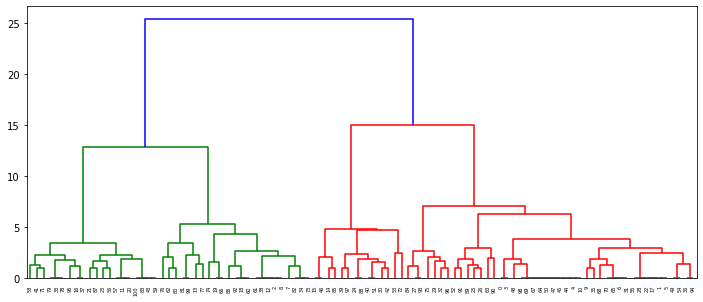

In [28]:
plt.figure(figsize = (12,5))
den = shc.dendrogram((shc.linkage(features, method="ward")))

## K means

In [29]:
df = pd.read_csv("driver-data.csv")

In [30]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [31]:
df = df.drop("id",axis=1)

In [32]:
df.isnull().sum()

mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [33]:
sc = StandardScaler()
df_sc = sc.fit_transform(df)

In [34]:
new = pd.DataFrame(df_sc, index=df.index, columns = df.columns)

In [35]:
new.head()

,mean_dist_day,mean_over_speed_perc
0,-0.089810,1.260613
1,-0.439773,1.041744
2,-0.215131,1.187656
3,-0.380666,0.822875
4,-0.401428,1.041744


In [36]:
from sklearn.cluster import KMeans

In [37]:
km = KMeans(n_clusters=5)
km.fit(new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
km.labels_

array([4, 4, 4, ..., 2, 2, 2], dtype=int32)

In [39]:
df["labels"] = km.labels_

In [40]:
df.head(10)

,mean_dist_day,mean_over_speed_perc,labels
0,71.24,28,4
1,52.53,25,4
2,64.54,27,4
3,55.69,22,4
4,54.58,25,4
5,41.91,10,1
6,58.64,20,4
7,52.02,8,1
8,31.25,34,0
9,44.31,19,4


In [41]:
import seaborn as sns

### Elbow method

In [42]:
wss =[]

for i in range(1,15):
    km = KMeans(n_clusters=i, init="k-means++")
    km.fit(new)
    wss.append(km.inertia_)

<AxesSubplot:>

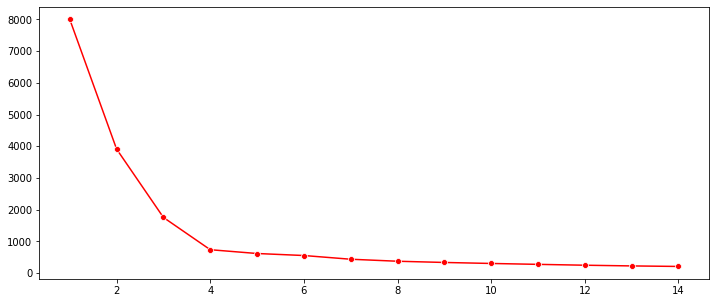

In [43]:
plt.figure(figsize=(12,5))
sns.lineplot(range(1,15), wss, marker="o", color="red")


In [44]:
print(wss)

[8000.0, 3911.926390428416, 1756.544582131428, 739.1534508645581, 619.4037594867996, 555.8950865349091, 438.8113631860348, 375.61489020019405, 337.2074990877828, 305.61630427594423, 277.2512003039992, 250.22116497062822, 228.08406344122548, 211.553863911261]


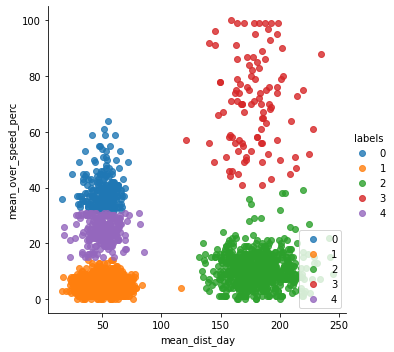

In [46]:
sns.lmplot(x = "mean_dist_day", y="mean_over_speed_perc", data=df, fit_reg=False, hue="labels", legend=True)
plt.legend(loc="lower right")
plt.show()